<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Anomaly Detection

In [478]:
!gdown --id 1Lfz8YlLk2GfccynPdilI49O6kQYRhEI0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lfz8YlLk2GfccynPdilI49O6kQYRhEI0
To: /content/Anomaly.xlsx
100% 30.6k/30.6k [00:00<00:00, 66.5MB/s]


## From Scratch

In [479]:
df = pd.read_excel("Anomaly.xlsx", sheet_name="X", header=None)
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


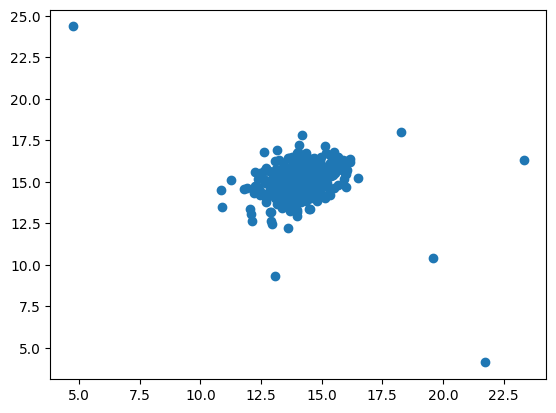

In [480]:
plt.figure()
plt.scatter(df[0], df[1])
plt.show()

In [481]:
df.describe()

,0,1
count,307.000000,307.000000
mean,14.112226,14.997711
std,1.355957,1.309707
min,4.752613,4.126232
25%,13.403351,14.361997
50%,14.059507,15.023113
75%,14.675503,15.654394
max,23.339868,24.350407


In [482]:
# Cgeck how many training examples are in this dataset
m = len(df)
print("Number of samples:", m)

Number of samples: 307


In [483]:
df.shape

(307, 2)

In [484]:
# Calculate the mean for each feature
s = np.sum(df, axis=0)
mu = s/m
mu

0    14.112226
1    14.997711
dtype: float64

In [485]:
# calculate the variance
vr = np.sum((df-mu)**2, axis=0)
variance = vr/m
variance

0    1.832631
1    1.709745
dtype: float64

In [486]:
# make the variance diagonal shaped
var_dia = np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [487]:
# Calculate the probability
kn = len(mu)
X = df - mu
p = 1/((2*np.pi)**(kn/2)*(np.linalg.det(var_dia)**0.5)) * np.exp(-0.5*np.sum(X @ np.linalg.pinv(var_dia) * X, axis=1))
p

0      6.470829e-02
1      5.030417e-02
2      7.245035e-02
3      5.031575e-02
4      6.368497e-02
           ...     
302    3.981340e-02
303    5.455673e-08
304    4.461721e-12
305    6.107184e-05
306    2.912867e-23
Length: 307, dtype: float64

In [488]:
# Let's put all these calculations for probability into a function for future use.
def probability(df):
  s = np.sum(df, axis=0)
  m = len(df)
  mu = s/m
  vr = np.sum((df-mu)**2, axis=0)
  variance = vr/m
  var_dia = np.diag(variance)
  n = len(mu)
  X = df - mu
  p = 1/((2*np.pi)**(n/2)*(np.linalg.det(var_dia)**0.5)) * np.exp(-0.5*np.sum(X @ np.linalg.pinv(var_dia) * X, axis=1))
  return p

## import val-set

In [489]:
cvx = pd.read_excel("Anomaly.xlsx", sheet_name="Xval", header=None)
cvx.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


In [490]:
cvy = pd.read_excel("Anomaly.xlsx", sheet_name="y", header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [491]:
p1 = probability(cvx)
y = np.array(cvy)

In [492]:
p1

0      4.201833e-02
1      7.445703e-02
2      3.618254e-02
3      5.403226e-02
4      6.629210e-02
           ...     
302    1.800521e-30
303    9.046525e-26
304    3.289709e-05
305    4.409436e-11
306    1.452964e-04
Length: 307, dtype: float64

In [493]:
p1.shape

(307,)

In [494]:
p1.describe()

count    3.070000e+02
mean     5.378568e-02
std      1.928081e-02
min      1.800521e-30
25%      4.212979e-02
50%      5.935014e-02
75%      6.924909e-02
max      7.864731e-02
dtype: float64

In [495]:
def tpfpfn(ep, p):
  tp, fp, fn = 0, 0, 0
  for i in range(len(y)):
    if p[i] <= ep and y[i][0] == 1:
      tp += 1
    elif p[i] <= ep and y[i][0] == 0:
      fp += 1
    elif p[i] > ep and y[i][0] == 1:
      fn += 1
  return tp, fp, fn

In [496]:
eps = [i for i in p1 if i <= p1.mean()]
len(eps)

128

In [497]:
# Define a function to calculate the 'f1' score
def f1(ep, p):
  tp, fp, fn = tpfpfn(ep, p1)
  prec = tp / (tp + fp)
  rec = tp / (tp + fn)
  f1 = 2 * prec * rec / (prec + rec)
  return f1

In [498]:
f = []
for i in eps:
  f.append(f1(i, p1))

In [499]:
len(f)

128

In [500]:
f

[0.16470588235294117,
 0.208955223880597,
 0.15384615384615385,
 0.3181818181818182,
 0.15555555555555556,
 0.125,
 0.56,
 0.13333333333333333,
 0.16867469879518074,
 0.12612612612612614,
 0.14583333333333331,
 0.22950819672131148,
 0.15053763440860213,
 0.16666666666666666,
 0.3888888888888889,
 0.12389380530973451,
 0.10294117647058823,
 0.19999999999999998,
 0.25925925925925924,
 0.1372549019607843,
 0.17283950617283952,
 0.13592233009708737,
 0.10370370370370369,
 0.17073170731707316,
 0.18918918918918923,
 0.27999999999999997,
 0.12844036697247707,
 0.23333333333333334,
 0.15909090909090906,
 0.10852713178294573,
 0.5833333333333334,
 0.1044776119402985,
 0.25,
 0.1473684210526316,
 0.12173913043478261,
 0.13861386138613863,
 0.10769230769230768,
 0.18666666666666665,
 0.11023622047244096,
 0.24137931034482757,
 0.2121212121212121,
 0.12068965517241378,
 0.3333333333333333,
 0.30434782608695654,
 0.14285714285714285,
 0.17721518987341772,
 0.5185185185185185,
 0.7368421052631577,


In [501]:
np.array(f).argmax()

127

In [502]:
# And now use this index to get the threshold probability
e = eps[127]
e

0.00014529639061630243

In [503]:
# Fiind out the Anamolous Examples
label = []
for i in range(len(df)):
  if p[i] <= e:
    label.append(1)
  else:
    label.append(0)

label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [504]:
df["label"] = np.array(label)
df.head()

,0,1,label
0,13.046815,14.741152,0
1,13.408520,13.763270,0
2,14.195915,15.853181,0
3,14.914701,16.174260,0
4,13.576700,14.042849,0


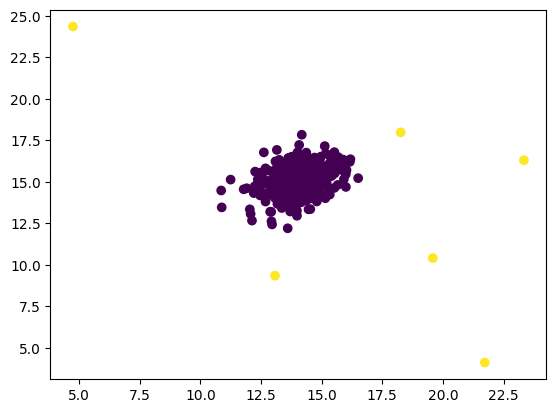

In [505]:
plt.figure()
plt.scatter(df[0], df[1], c=df["label"])
plt.show()

# Anomaly Detection Techniques

In [506]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings("ignore")

In [507]:
!gdown --id 1J25KWxM0cI7CxsHrGVB9DL-4q1GEfhww

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J25KWxM0cI7CxsHrGVB9DL-4q1GEfhww
To: /content/Mall_Customers.csv
100% 4.29k/4.29k [00:00<00:00, 10.8MB/s]


In [508]:
# Data preprocessing
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [509]:
df.shape

(200, 5)

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [511]:
# Dataframe trimming
df = df.rename(columns={
    "Genre": "gender",
    "Spending Score (1-100)": "score",
    "Annual Income (k$)": "income"
    })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   income      200 non-null    int64 
 4   score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [512]:
# Access to the values of a specific column
print(type(df.iloc[:,0]))
print(type(df.values[:,0]))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [513]:
X = df[["income", "score"]]

In [514]:
X.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [515]:
X.iloc[0]

income    15
score     39
Name: 0, dtype: int64

In [516]:
X.loc[0].reset_index()

,index,0
0,income,15
1,score,39


In [517]:
X.loc[0].reset_index().T

,0,1
index,income,score
0,15,39


In [518]:
X.loc[0].reset_index().T.shape

(2, 2)

In [519]:
X.values[:,0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [520]:
X.iloc[:,0]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: income, Length: 200, dtype: int64

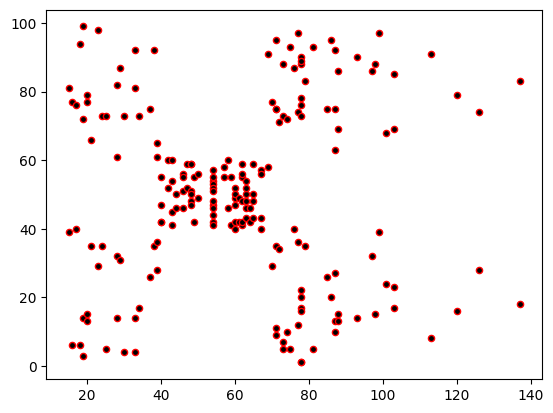

In [521]:
plt.scatter(X["income"], X["score"], s=20, edgecolors='r', c='k')

## DBSCAN

In [522]:
dbscan = DBSCAN(eps=0.3, min_samples=5, metric="euclidean") #eps sets the sensitivity
clusters = dbscan.fit_predict(X)

In [523]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [524]:
dbscan = DBSCAN(eps=0.3, min_samples=5, metric="euclidean", n_jobs=-1)
clusters = dbscan.fit_predict(X)

clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [525]:
# Normalization
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [526]:
dbscan = DBSCAN(eps=0.3, min_samples=5, metric="euclidean", n_jobs=-1)
clusters = dbscan.fit_predict(X)

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [527]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric="euclidean", n_jobs=-1)
clusters = dbscan.fit_predict(X)

clusters

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2, -1,  2,  0,
       -1,  0,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1])

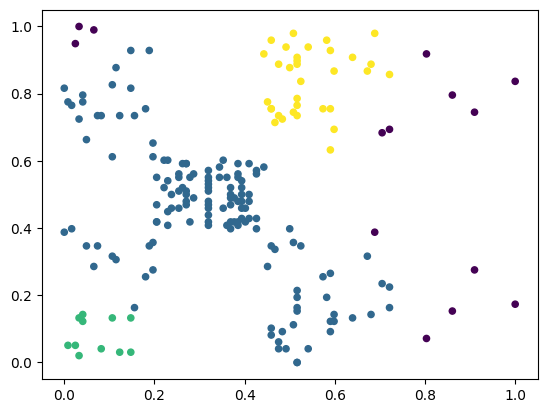

In [528]:
plt.scatter(X[:,0], X[:,1], s=20, c=clusters) # column name doesn't work?

In [529]:
for i in range(len(clusters)):
  if clusters[i] != -1:
    clusters[i] = 0

In [530]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## IsolationForest

In [531]:
if_an = IsolationForest(n_estimators=25, max_features=1, max_samples=50, contamination="auto", warm_start=True)
if_an = if_an.fit_predict(X)
if_an

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [532]:
if_an = IsolationForest(n_estimators=25, max_features=1, max_samples=50, contamination=0.1, warm_start=True)
if_an_list = if_an.fit_predict(X)
if_an_list

array([ 1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1])

In [533]:
if_an_list = pd.Series(if_an_list).replace([-1,1], [1,0]) # another form of replacing

In [534]:
if_an_list

0      0
1      1
2      1
3      0
4      0
      ..
195    1
196    1
197    0
198    1
199    1
Length: 200, dtype: int64

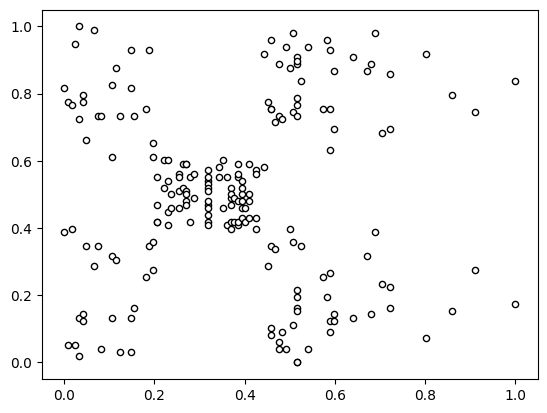

In [535]:
plt.scatter(X[:,0], X[:,1], s=20, c='w', edgecolors='k')

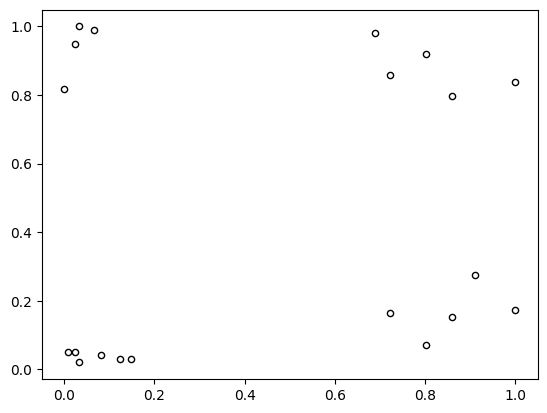

In [536]:
X_if_an = X[if_an_list==1]
plt.scatter(X_if_an[:,0], X_if_an[:,1], s=20, c='w', edgecolors='k')

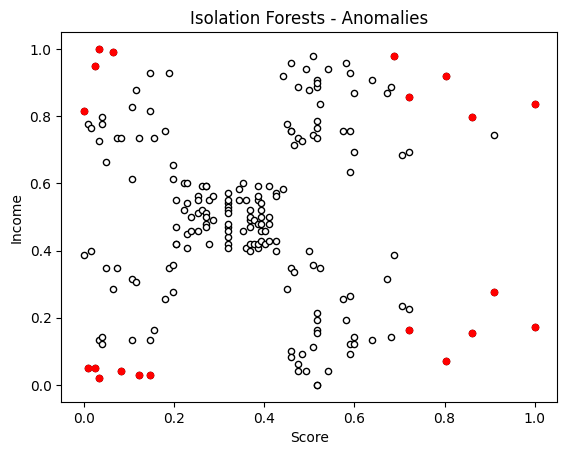

In [537]:
plt.scatter(X[:,0], X[:,1], s=20, c='w', edgecolors='k')
plt.scatter(X_if_an[:,0], X_if_an[:,1], s=20, c='r')
plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Isolation Forests - Anomalies")
plt.show()

## LocalOutlierFactor

In [538]:
lof_an = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
lof_an_labels = lof_an.fit_predict(X)
lof_an_labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1])

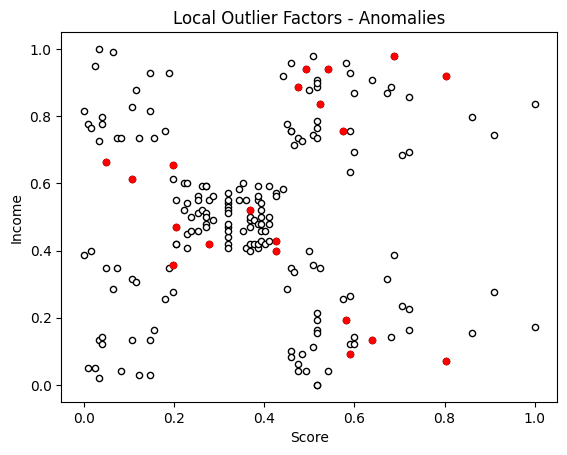

In [539]:
X_lof_an = X[lof_an_labels==-1]
plt.scatter(X[:,0], X[:,1], s=20, c='w', edgecolors='k')
plt.scatter(X_lof_an[:,0], X_lof_an[:,1], s=20, c='r')
plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Local Outlier Factors - Anomalies")
plt.show()

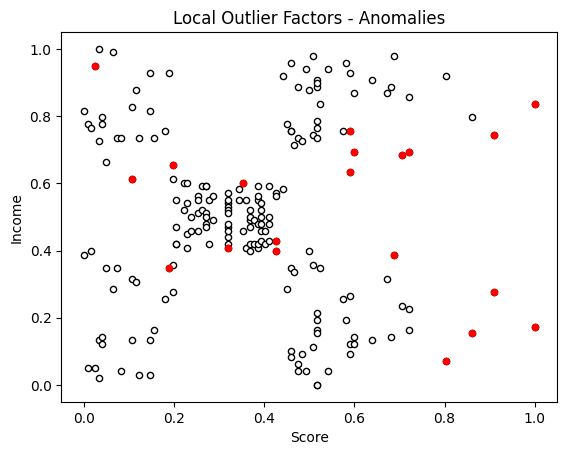

In [540]:
lof_an = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
lof_an_labels = lof_an.fit_predict(X)
X_lof_an = X[lof_an_labels==-1]
plt.scatter(X[:,0], X[:,1], s=20, c='w', edgecolors='k')
plt.scatter(X_lof_an[:,0], X_lof_an[:,1], s=20, c='r')
plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Local Outlier Factors - Anomalies")
plt.show()

## OneClassSVM

In [541]:
onecsvm_an =  OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
onecsvm_an_labels = onecsvm_an.fit_predict(X)
onecsvm_an_labels

array([ 1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [542]:
onecsvm_an =  OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
onecsvm_an_labels = onecsvm_an.fit_predict(X)
onecsvm_an_labels

array([ 1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1])

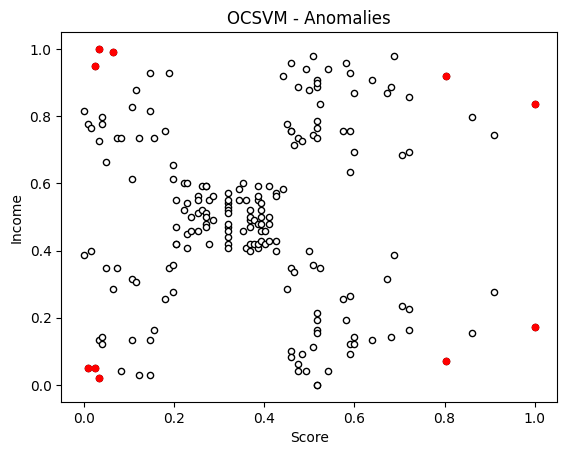

In [543]:
X_onecsvm_an = X[onecsvm_an_labels==-1]
plt.scatter(X[:,0], X[:,1], s=20, c='w', edgecolors='k')
plt.scatter(X_onecsvm_an[:,0], X_onecsvm_an[:,1], s=20, c='r')
plt.xlabel("Score")
plt.ylabel("Income")
plt.title("OCSVM - Anomalies")
plt.show()

## EllipticEnvelope

In [544]:
ee_an = EllipticEnvelope(contamination=0.1)
ee_an_labels = ee_an.fit_predict(X)
ee_an_labels

array([ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1])

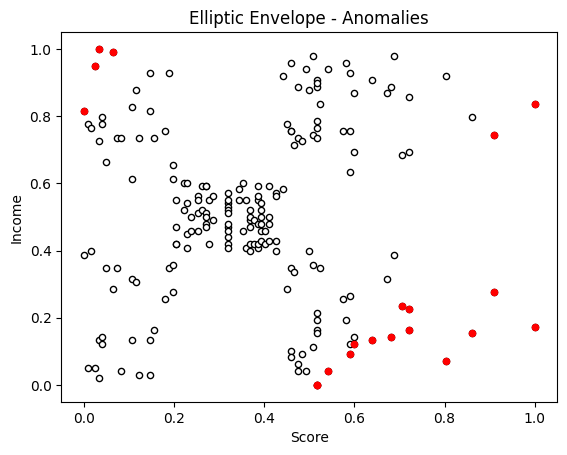

In [545]:
X_ee_an = X[ee_an_labels==-1]
plt.scatter(X[:,0], X[:,1], s=20, c='w', edgecolors='k')
plt.scatter(X_ee_an[:,0], X_ee_an[:,1], s=20, c='r')
plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Elliptic Envelope - Anomalies")
plt.show()